In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from statistics import mean 
import numpy as np
import matplotlib.pyplot as plt
import data

In [2]:
# Loading up the data
d = data.Data()

# 1.1 Exploratory Data Analysis 
### Columns for our individual data

In [3]:
list(d.individual.columns)

['age',
 'sex',
 'province',
 'country',
 'latitude',
 'longitude',
 'date_confirmation',
 'additional_information',
 'source',
 'outcome']

In [4]:
### Columns for our location data

In [5]:
list(d.location.columns)

['Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Combined_Key',
 'Incidence_Rate',
 'Case-Fatality_Ratio']

## Values missing from the individual cases

In [6]:
for col in d.individual.columns:
    print(f'Column {col} has {d.individual[col].isna().sum()} missing values')

Column age has 296874 missing values
Column sex has 293734 missing values
Column province has 6568 missing values
Column country has 24 missing values
Column latitude has 2 missing values
Column longitude has 2 missing values
Column date_confirmation has 462 missing values
Column additional_information has 522969 missing values
Column source has 209191 missing values
Column outcome has 0 missing values


## Values missing from the location cases

In [7]:
for col in d.location.columns:
    print(f'Column {col} has {d.location[col].isna().sum()} missing values')

Column Province_State has 168 missing values
Column Country_Region has 0 missing values
Column Last_Update has 0 missing values
Column Lat has 80 missing values
Column Long_ has 80 missing values
Column Confirmed has 0 missing values
Column Deaths has 0 missing values
Column Recovered has 0 missing values
Column Active has 2 missing values
Column Combined_Key has 0 missing values
Column Incidence_Rate has 80 missing values
Column Case-Fatality_Ratio has 48 missing values


## 1.1b Graphs

In [29]:
import graphs.graphs as gp

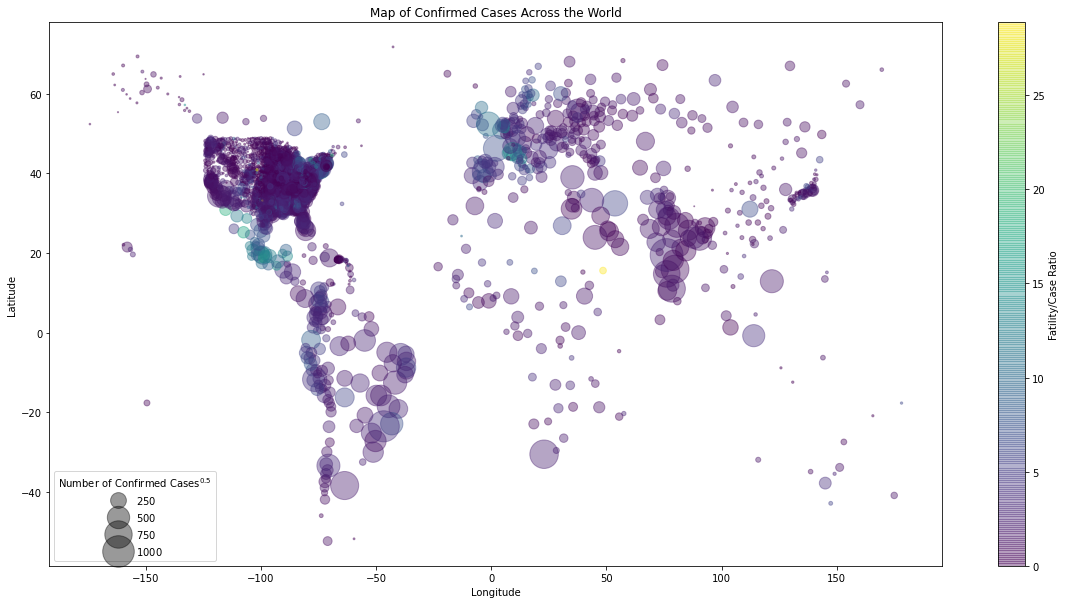

In [30]:
gp.confirmed_cases(d.location)

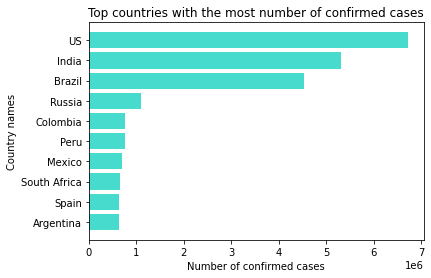

In [33]:
gp.most_confirmed_cases(d.location)

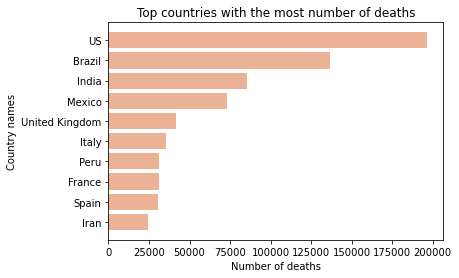

In [34]:
gp.most_deaths(d.location)

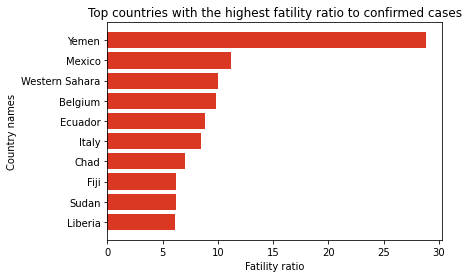

In [36]:
gp.most_fatality_rate(d.location)

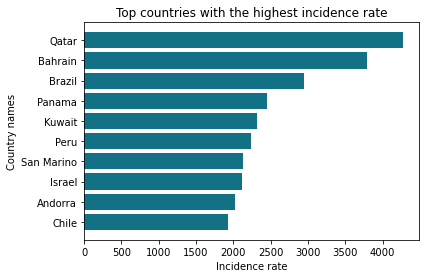

In [38]:
gp.most_incidence_rate(d.location)

In [ ]:
gp.

## 1.2 Converting the age to a reasonable value
For range ages we used the mean of the upper and lower bound to represent the age of the patient and for ages that we had an age and above, we use the base age for representing the patients age

In [8]:
d.individual['age'] = d.individual['age'].apply(d.format_age)
d.individual.head(5)

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Gujarat,India,23.02776,72.60027,15.04.2020,NaN,https://gujcovid19.gujarat.gov.in/uploads/pres...,hospitalized
1,21.0,male,Moyobamba,Peru,-6.03271,-76.97230,09.05.2020,NaN,NaN,nonhospitalized
2,94.0,female,Lima,Peru,-12.04318,-77.02824,15.04.2020,NaN,NaN,nonhospitalized
3,NaN,NaN,Gujarat,India,23.02776,72.60027,22.05.2020,NaN,https://www.deshgujarat.com/2020/05/22/gujarat...,hospitalized
4,2.0,female,Coronel Portillo,Peru,-8.40921,-74.55572,30.04.2020,NaN,NaN,nonhospitalized


## Formating the dates

In [9]:
d.individual['date_confirmation']=d.individual['date_confirmation'].apply(d.format_dates)
d.individual.head(5)

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Gujarat,India,23.02776,72.60027,2020-04-15,NaN,https://gujcovid19.gujarat.gov.in/uploads/pres...,hospitalized
1,21.0,male,Moyobamba,Peru,-6.03271,-76.97230,2020-05-09,NaN,NaN,nonhospitalized
2,94.0,female,Lima,Peru,-12.04318,-77.02824,2020-04-15,NaN,NaN,nonhospitalized
3,NaN,NaN,Gujarat,India,23.02776,72.60027,2020-05-22,NaN,https://www.deshgujarat.com/2020/05/22/gujarat...,hospitalized
4,2.0,female,Coronel Portillo,Peru,-8.40921,-74.55572,2020-04-30,NaN,NaN,nonhospitalized


# 1.3 Remove outliers

In [10]:
# Remove values without longitude and latitude. These values are cruiseships and unknown counties
# Remove values with out-of-bounds long/lat ranges
d.location = d.remove_outliers_loc(d.location)

# Drop empty cases with no country or location data
# Remove values with out-of-bounds long/lat ranges
d.individual = d.remove_outliers_ind(d.individual)

# 1.4 Aggregate states 

## US cases

In [14]:
us_cases = d.location[d.location['Country_Region'] == 'US'].groupby(['Province_State']).agg({'Confirmed':'sum'}).reset_index()
us_cases[['Province_State', 'Confirmed']].plot(x='Province_State',kind='bar',figsize=(24,8),logy=True,xlabel='States', ylabel='Log of # of cases', title='Confirmed cases across US', rot=75)
plt.close()

In [15]:
us_loc = d.location[d.location['Country_Region'] == 'US']
us_loc.head

<bound method NDFrame.head of      Province_State Country_Region          Last_Update        Lat  \
631         Alabama             US  2020-09-20 04:22:56  32.539527   
632         Alabama             US  2020-09-20 04:22:56  30.727750   
633         Alabama             US  2020-09-20 04:22:56  31.868263   
634         Alabama             US  2020-09-20 04:22:56  32.996421   
635         Alabama             US  2020-09-20 04:22:56  33.982109   
...             ...            ...                  ...        ...   
3895        Wyoming             US  2020-09-20 04:22:56  41.659439   
3896        Wyoming             US  2020-09-20 04:22:56  43.935225   
3897        Wyoming             US  2020-09-20 04:22:56  41.287818   
3899        Wyoming             US  2020-09-20 04:22:56  43.904516   
3900        Wyoming             US  2020-09-20 04:22:56  43.839612   

           Long_  Confirmed  Deaths  Recovered  Active  \
631   -86.644082       1673      24          0  1649.0   
632   -87.722

In [17]:
states = us_loc['Province_State'].unique()

In [19]:
def weighted_sum(states, data, lat_long):
    weighted_list = []
    for state in states:
        tmp = data[data['Province_State'] == state]
        num = (tmp['Confirmed']*tmp[lat_long]).sum()
        den = tmp['Confirmed'].sum()
        total = num/den
        weighted_list.append(total)
    return weighted_list

In [20]:
weighted_lat_list = weighted_sum(states, us_loc, 'Lat')

In [21]:
weighted_long_list = weighted_sum(states, us_loc, 'Long_')

In [22]:
def sum_of_cases(caseStatus, states, data):
    sumOfCases = []
    for state in states:
        tmp = data[data['Province_State'] == state]
        total = 0
        for index, row in tmp.iterrows():
            if row.str.contains(state).any():
                total += row[caseStatus]
        sumOfCases.append(total)
    return sumOfCases

In [23]:
def population_Total(states, data):
    population = []
    for state in states:
        tmp = data[data['Province_State'] == state]
        total = 0
        for index, row in tmp.iterrows():
            if row.str.contains(state).any():
                ratio = row['Incidence_Rate']
                if ratio == 0:
                    continue
                cases = row['Confirmed']
                total += (cases*100000)/ratio
        population.append(total)
    return population

In [24]:
def aggregated_Incidence_Rate(population, confirmedSum):
    incidence_rate = []
    for a in range(len(population)):
        rate = (confirmedSum[a] * 100000)/population[a]
        incidence_rate.append(rate)
    return incidence_rate

In [25]:
def case_Fatality(confirmedCase, confirmedDeath):
    fatality_rate = []
    for a in range(len(confirmedCase)):
        fatality_rate.append((confirmedDeath[a]/confirmedCase[a])*100)
    return fatality_rate

In [26]:
def state_Key(states):
    keys = []
    for state in states:
        key = state + ", US"
        keys.append(key)
    return keys

In [28]:
total_US_State_Confirmed = sum_of_cases('Confirmed', states, us_loc)
total_US_State_Deaths = sum_of_cases('Deaths', states, us_loc)
total_US_State_Recovered = sum_of_cases('Recovered', states, us_loc)
total_US_State_Active = sum_of_cases('Active', states, us_loc)

population = population_Total(states, us_loc)
incidence_Rate = aggregated_Incidence_Rate(population, total_US_State_Confirmed)
fatality_Rate = case_Fatality(total_US_State_Confirmed, total_US_State_Deaths)
keys = state_Key(states)

# All US data updated at same time
temp = us_loc['Last_Update'].unique()
last_update = temp[0]

states_weighted_sum = pd.DataFrame({'state':states, 'Last_Update': last_update, 'latitude':weighted_lat_list, 'longitude':weighted_long_list, 'Confirmed': total_US_State_Confirmed, 'Deaths': total_US_State_Deaths, 'Recovered': total_US_State_Recovered, 'Active': total_US_State_Active, 'Combined_Key': keys, 'Incidence_Rate': incidence_Rate, 'Case-Fatality_Ratio': fatality_Rate },)
states_weighted_sum.head(5)

,state,Last_Update,latitude,longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,Alabama,2020-09-20 04:22:56,32.946377,-86.762849,144164,2437,0,141727.0,"Alabama, US",2940.211312,1.690436
1,Alaska,2020-09-20 04:22:56,61.728977,-148.497129,6728,45,0,6683.0,"Alaska, US",925.928475,0.668847
2,Arizona,2020-09-20 04:22:56,33.304434,-112.280897,212938,5449,0,207489.0,"Arizona, US",2925.488105,2.558961
3,Arkansas,2020-09-20 04:22:56,35.135365,-92.701716,73511,1181,0,72330.0,"Arkansas, US",2435.910351,1.606562
4,California,2020-09-20 04:22:56,35.271573,-118.783025,783313,15018,0,768295.0,"California, US",1982.457428,1.917241
